## Regression 

### Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
X = data.iloc[:,0].values;
Y = data.iloc[:,1].values;

### x as a feature vector and y as a response vector

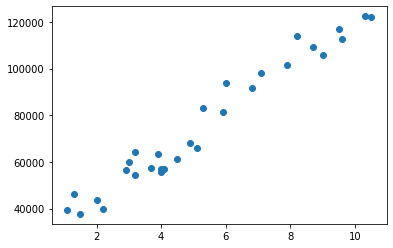

In [4]:
plt.scatter(X,Y)

#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [5]:
def find_m_b(x,y):
    m = (((np.mean(x) * np.mean(y)) - np.mean(x*y))/
        ((np.mean(x)**2) - np.mean(x**2)))
    
    b = np.mean(y) - (m*np.mean(x))
    
    return m,b

In [6]:
X, Y

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [7]:
# fit()
m,b=find_m_b(X,Y)

In [8]:
print("m={} \nb={}".format(m,b))

m=9449.962321455081 
b=25792.200198668666


### Let's make predictions

In [9]:
# predict()
ypred = []
for i in X:
    pred = m*i+b  #y = mx+b
    ypred.append(pred)

In [10]:
ypred[:5]

[36187.15875226926,
 38077.151216560276,
 39967.14368085129,
 44692.12484157883,
 46582.11730586985]

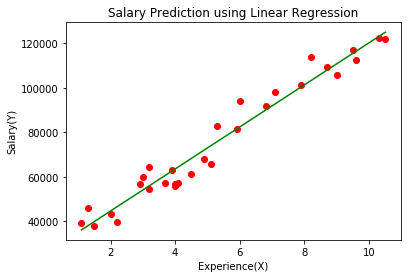

In [17]:
plt.title("Salary Prediction using Linear Regression")
plt.scatter(X,Y,c="red")
plt.plot(X,ypred,c="green")
plt.xlabel("Experience(X)")
plt.ylabel("Salary(Y)")
plt.show()

In [13]:
1,2

(1, 2)

In [18]:
df = pd.DataFrame({"X":X,"Actual_Salary":Y,"Predicted_Salary":ypred})
df

X  Actual_Salary  Predicted_Salary
0    1.1        39343.0      36187.158752
1    1.3        46205.0      38077.151217
2    1.5        37731.0      39967.143681
3    2.0        43525.0      44692.124842
4    2.2        39891.0      46582.117306
5    2.9        56642.0      53197.090931
6    3.0        60150.0      54142.087163
7    3.2        54445.0      56032.079627
8    3.2        64445.0      56032.079627
9    3.7        57189.0      60757.060788
10   3.9        63218.0      62647.053252
11   4.0        55794.0      63592.049484
12   4.0        56957.0      63592.049484
13   4.1        57081.0      64537.045717
14   4.5        61111.0      68317.030645
15   4.9        67938.0      72097.015574
16   5.1        66029.0      73987.008038
17   5.3        83088.0      75877.000502
18   5.9        81363.0      81546.977895
19   6.0        93940.0      82491.974127
20   6.8        91738.0      90051.943985
21   7.1        98273.0      92886.932681
22   7.9       101302.0     100446.902538
23   8.2       113812.0     103281.891235
24   8.7       109431.0     108006.872395
25   9.0       105582.0     110841.861092
26   9.5       116969.0     115566.842252
27   9.6       112635.0     116511.838485
28  10.3       122391.0     123126.812110
29  10.5       121872.0     125016.804574

### Performance metrics
- mean squared error
- r2 score

<img src='mse.gif'>

In [ ]:
(actual-prediction)**2/N

In [22]:
MSE=np.sum((Y-ypred)**2)/len(X)


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="images/rsq.png" />

In [30]:
def squared_error(y_original,y_line):
    return sum((y_original-y_line)**2)

In [31]:
y_mean = [np.mean(Y) for i in Y]
def coefficient_of_determination(y_original, y_pred):
    squared_err_rgr = squared_error(y_original, y_pred)
    squared_err_mean = squared_error(y_original, y_mean)
    
    return 1-(squared_err_rgr/squared_err_mean)

In [33]:
r2=coefficient_of_determination(Y,ypred)

In [34]:
print("r2 score: ",r2)

r2 score:  0.9569566641435086


### Using ScikitLearn...

In [37]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [48]:
# X
data.iloc[:,0].ndim

1

In [38]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
m,b

(9449.962321455081, 25792.200198668666)

In [45]:
lr.coef_

array([[9449.96232146]])

In [52]:
lr.intercept_

array([25792.20019867])

In [59]:
prediction=lr.predict(X)

In [60]:
lr.score(Y,prediction)

-835179265.8689986

In [62]:
from sklearn.metrics import r2_score

r2_score(Y,prediction),r2

(0.9569566641435086, 0.9569566641435086)